In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [5]:
cdf = df.copy()

In [6]:
odf = pd.DataFrame(columns=['col','q1','q3','IQR','ulimit','llimit','inliers','outliers','%inliers','%outliers'])

for col in df.columns:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)
    IQR = q3-q1
    ulimit = q3+(1.5*IQR)
    llimit = q1-(1.5*IQR)
    filtered = df[np.logical_and(df[col]>=llimit,df[col]<=ulimit)]
    inliers = filtered.shape[0]
    outliers = df.shape[0] - inliers
    perc_inliers = (inliers/df.shape[0])*100
    perc_outliers = (outliers/df.shape[0])*100
    odf.loc[len(odf)] = {'col':col,'q1':q1,'q3':q3,'IQR':IQR,'ulimit':ulimit,'llimit':llimit,'inliers':inliers,'outliers':outliers,'%inliers':perc_inliers,'%outliers':perc_outliers}


In [9]:
odf.col.values[-11:]

array(['dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate',
       'dsthostsrvserrorrate', 'dsthostrerrorrate',
       'dsthostsrvrerrorrate', 'lastflag'], dtype=object)

<Axes: xlabel='dsthostcount'>

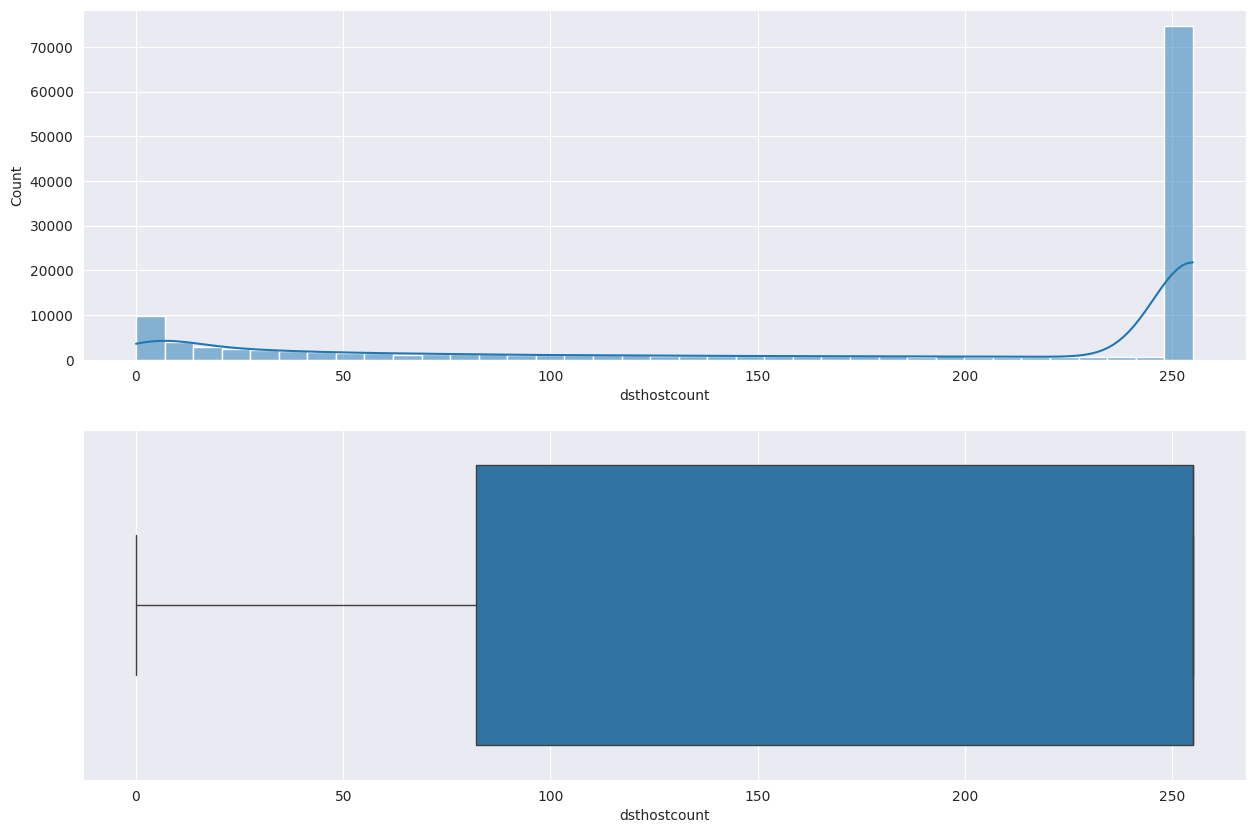

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['dsthostcount'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['dsthostcount'])

<Axes: xlabel='logdsthostcount', ylabel='Count'>

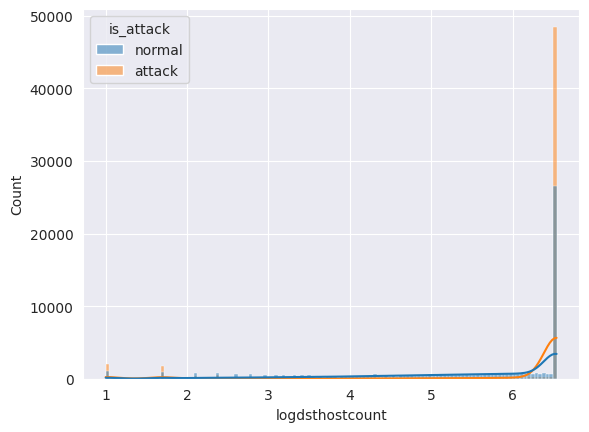

In [11]:
cdf['logdsthostcount'] = np.log(cdf['dsthostcount'])+1
sns.histplot(data=cdf,x='logdsthostcount',kde=True,hue='is_attack')

<Axes: xlabel='dsthostcount', ylabel='Count'>

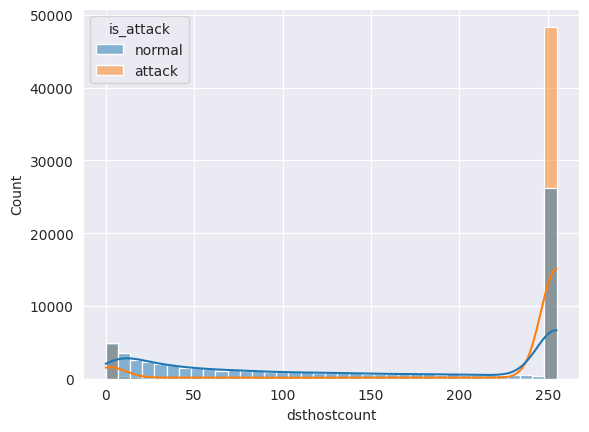

In [12]:
sns.histplot(data=cdf,x='dsthostcount',kde=True,hue='is_attack')

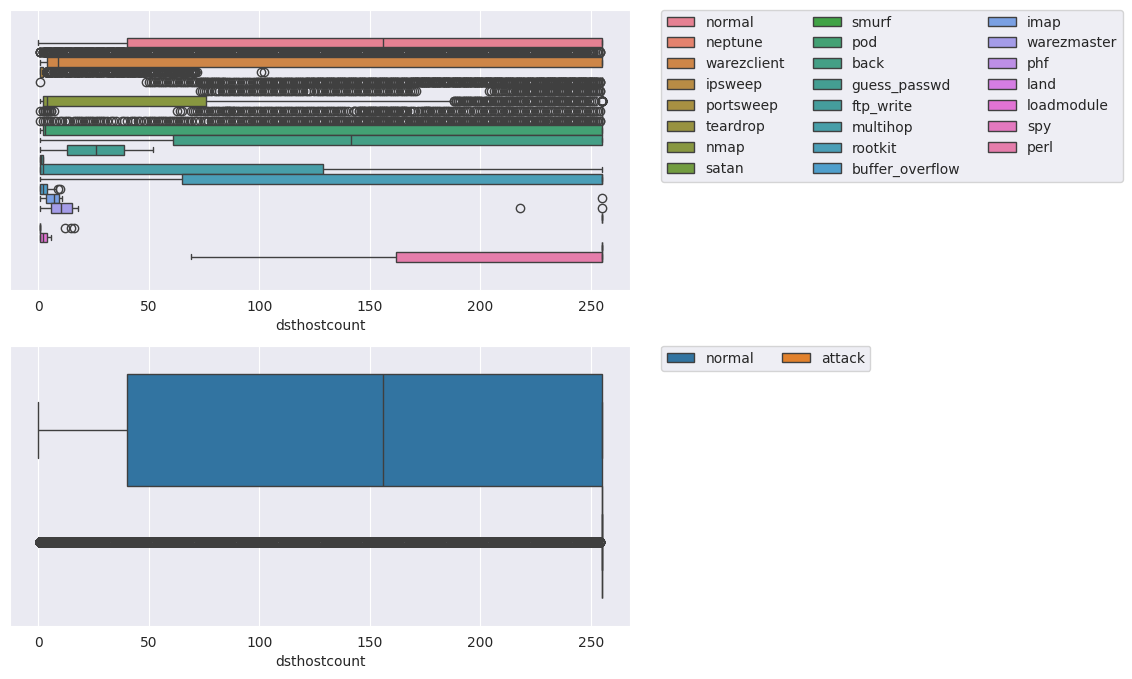

In [13]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='dsthostcount',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='dsthostcount',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [14]:
odf[odf['col'] == 'dsthostcount']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
28,dsthostcount,82.0,255.0,173.0,514.5,-177.5,125973,0,100.0,0.0


In [15]:
pd.DataFrame(df['dsthostcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostcount,125973.0,182.148945,99.206213,0.0,82.0,255.0,255.0,255.0


In [16]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostcount'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 11.0
20 percentile value is 50.0
30 percentile value is 123.0
40 percentile value is 237.0
50 percentile value is 255.0
60 percentile value is 255.0
70 percentile value is 255.0
80 percentile value is 255.0
90 percentile value is 255.0
100 percentile value is 255.0


In [17]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostcount'].dropna(),i)))

90 percentile value is 255.0
91 percentile value is 255.0
92 percentile value is 255.0
93 percentile value is 255.0
94 percentile value is 255.0
95 percentile value is 255.0
96 percentile value is 255.0
97 percentile value is 255.0
98 percentile value is 255.0
99 percentile value is 255.0
100 percentile value is 255.0


<Axes: xlabel='dsthostsrvcount'>

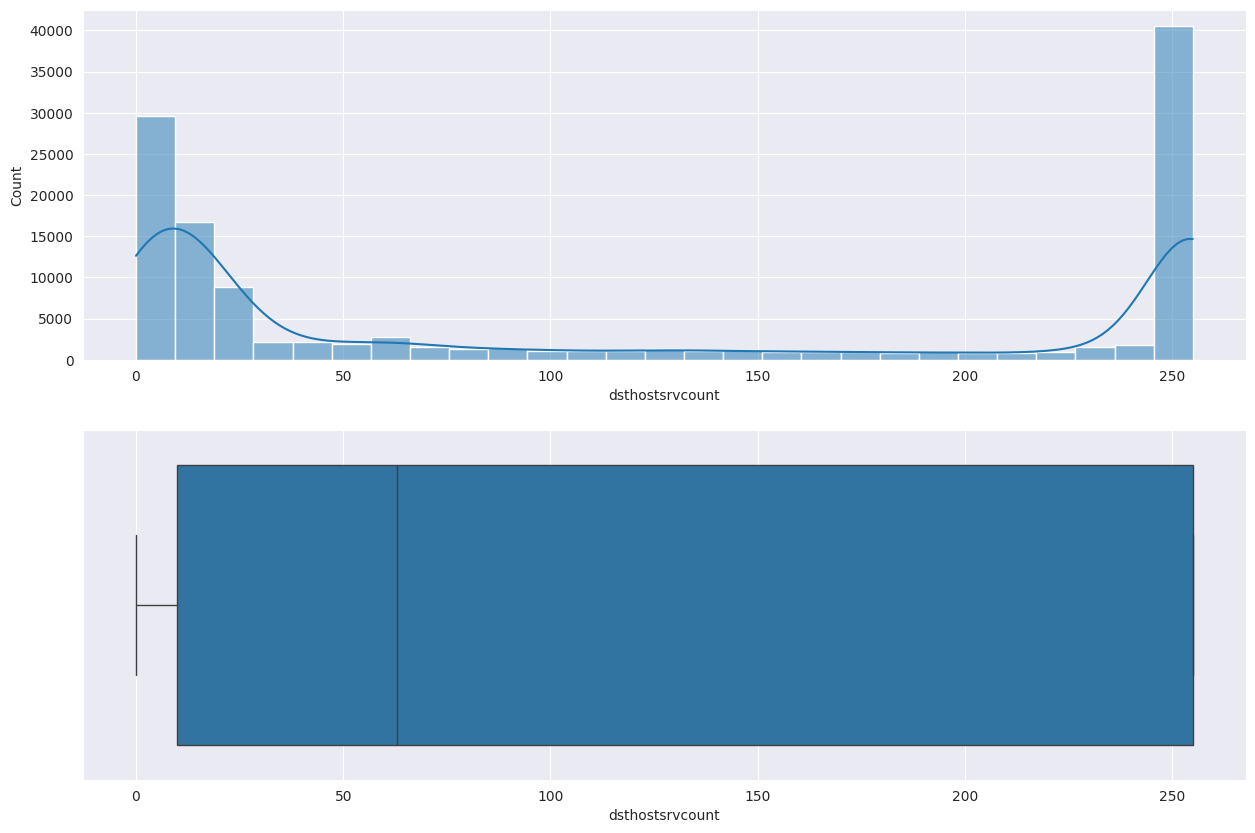

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['dsthostsrvcount'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['dsthostsrvcount'])

<Axes: xlabel='logdsthostsrvcount', ylabel='Count'>

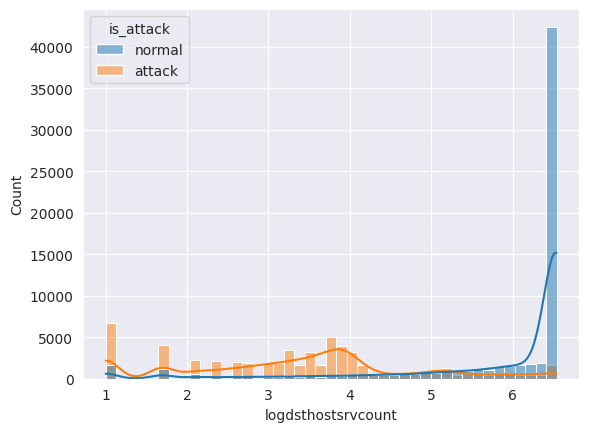

In [19]:
cdf['logdsthostsrvcount'] = np.log(cdf['dsthostsrvcount'])+1
sns.histplot(data=cdf,x='logdsthostsrvcount',kde=True,hue='is_attack')

<Axes: xlabel='dsthostsrvcount', ylabel='Count'>

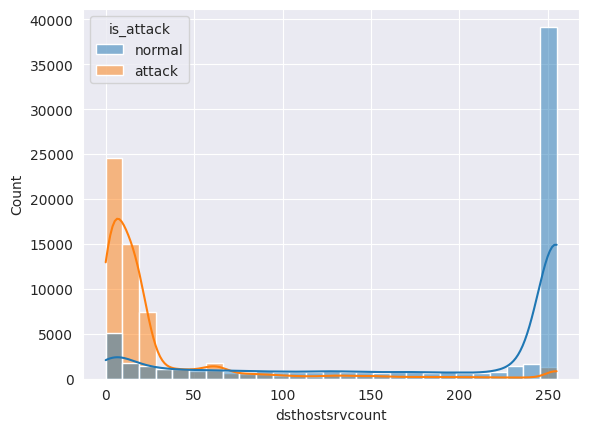

In [20]:
sns.histplot(data=cdf,x='dsthostsrvcount',kde=True,hue='is_attack')

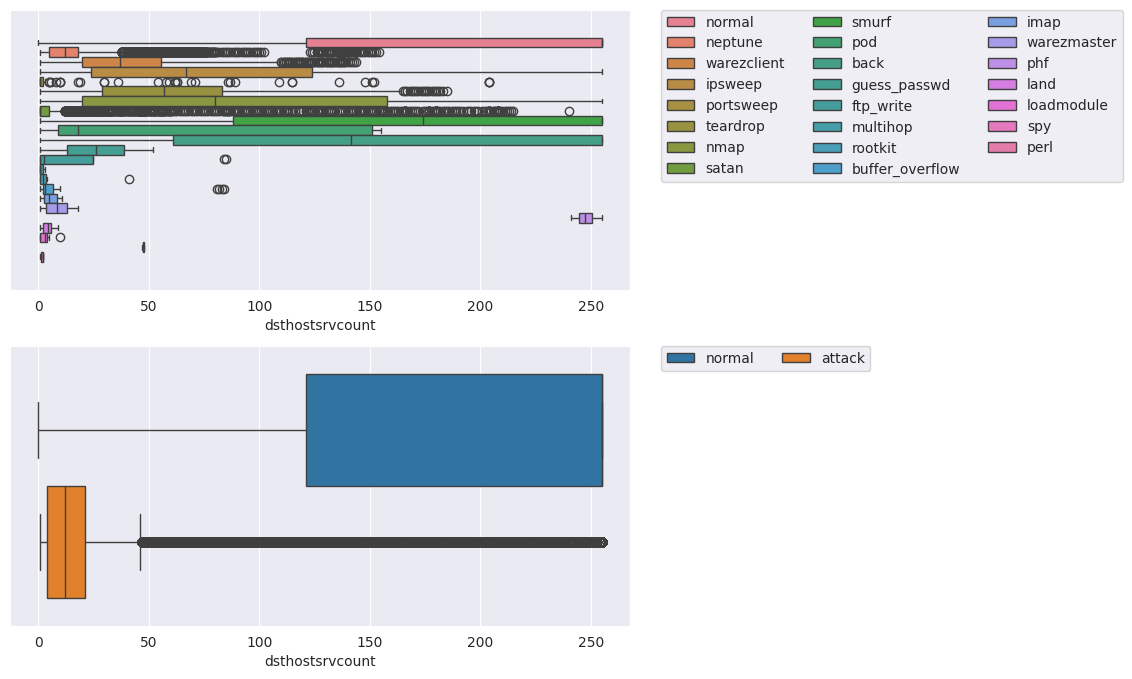

In [21]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='dsthostsrvcount',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='dsthostsrvcount',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [22]:
odf[odf['col'] == 'dsthostsrvcount']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
29,dsthostsrvcount,10.0,255.0,245.0,622.5,-357.5,125973,0,100.0,0.0


In [23]:
pd.DataFrame(df['dsthostsrvcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvcount,125973.0,115.653005,110.702741,0.0,10.0,63.0,255.0,255.0


In [24]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvcount'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 2.0
20 percentile value is 7.0
30 percentile value is 14.0
40 percentile value is 20.0
50 percentile value is 63.0
60 percentile value is 157.0
70 percentile value is 254.0
80 percentile value is 255.0
90 percentile value is 255.0
100 percentile value is 255.0


In [25]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvcount'].dropna(),i)))

90 percentile value is 255.0
91 percentile value is 255.0
92 percentile value is 255.0
93 percentile value is 255.0
94 percentile value is 255.0
95 percentile value is 255.0
96 percentile value is 255.0
97 percentile value is 255.0
98 percentile value is 255.0
99 percentile value is 255.0
100 percentile value is 255.0


In [26]:
odf.col.values[-11:]

array(['dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate',
       'dsthostsrvserrorrate', 'dsthostrerrorrate',
       'dsthostsrvrerrorrate', 'lastflag'], dtype=object)

<Axes: xlabel='dsthostsamesrvrate'>

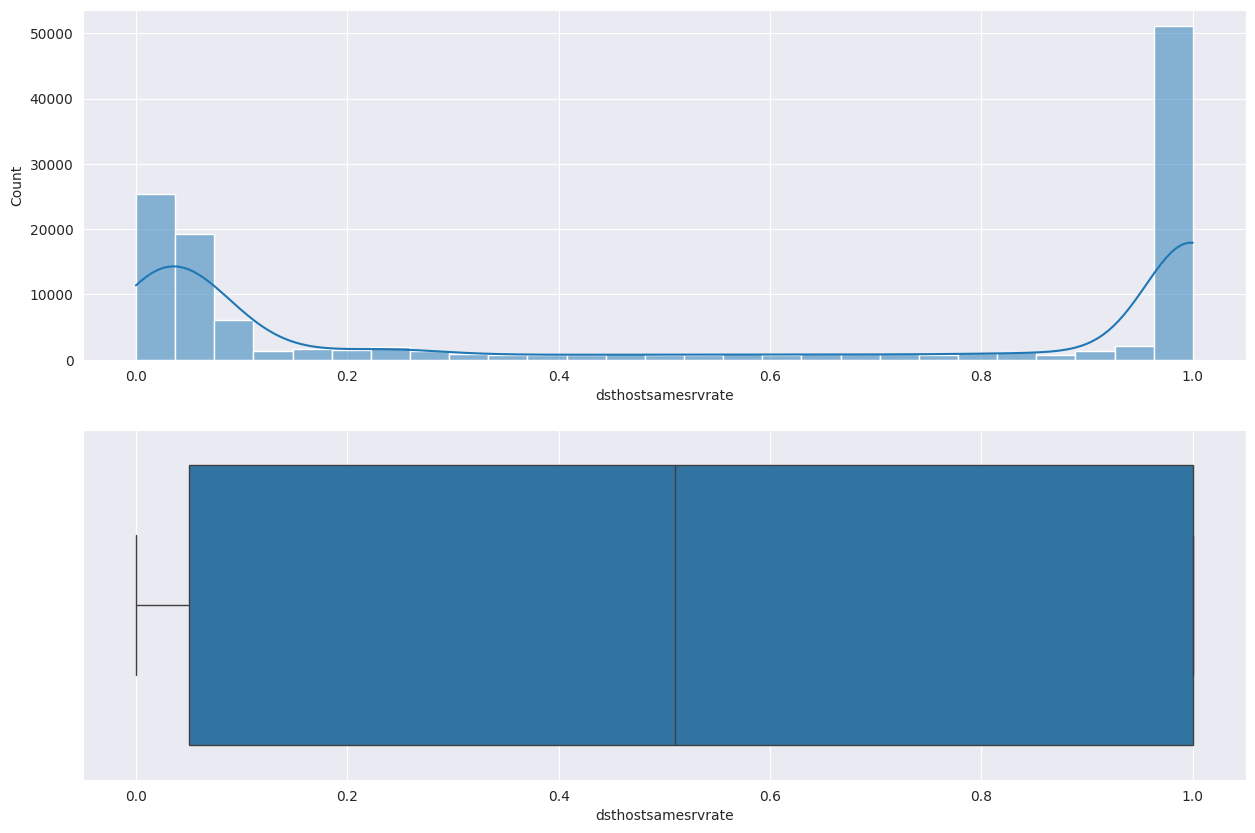

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['dsthostsamesrvrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['dsthostsamesrvrate'])

<Axes: xlabel='logdsthostsamesrvrate', ylabel='Count'>

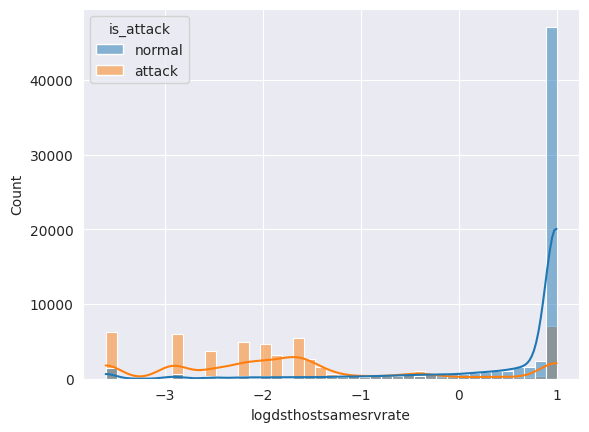

In [28]:
cdf['logdsthostsamesrvrate'] = np.log(cdf['dsthostsamesrvrate'])+1
sns.histplot(data=cdf,x='logdsthostsamesrvrate',kde=True,hue='is_attack')

<Axes: xlabel='dsthostsamesrvrate', ylabel='Count'>

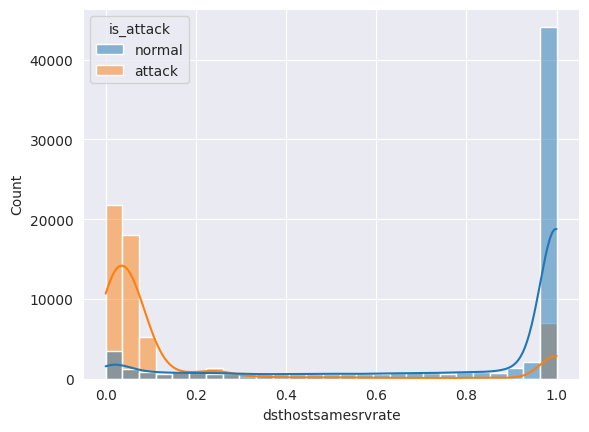

In [29]:
sns.histplot(data=cdf,x='dsthostsamesrvrate',kde=True,hue='is_attack')

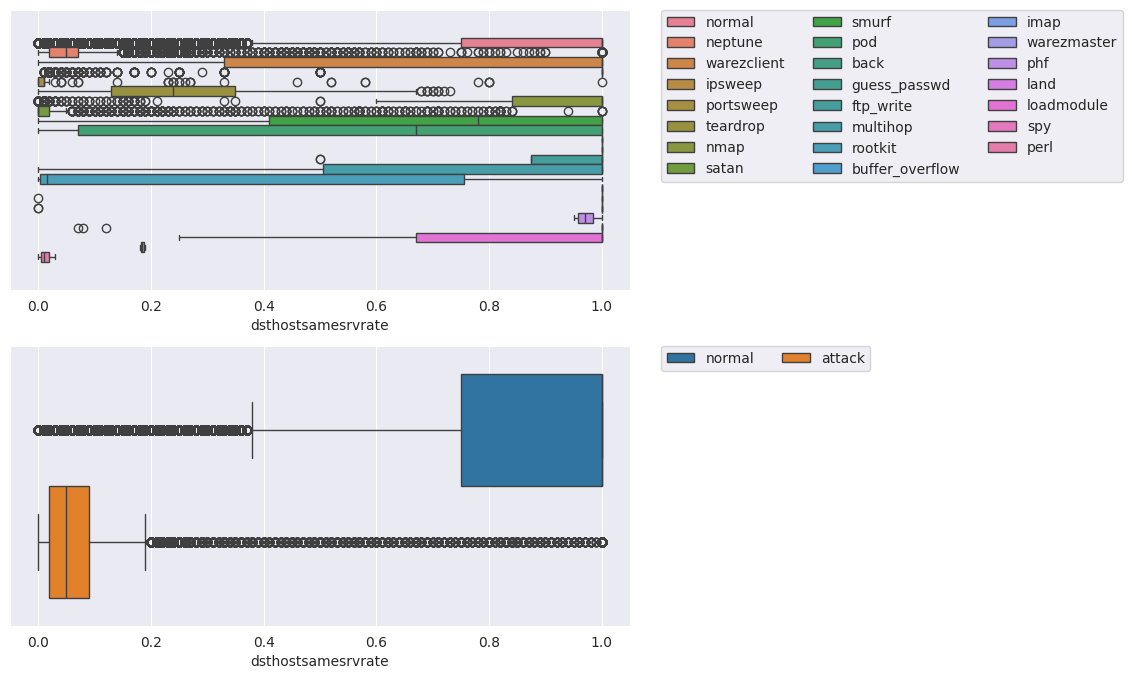

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='dsthostsamesrvrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='dsthostsamesrvrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [31]:
odf[odf['col'] == 'dsthostsamesrvrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
30,dsthostsamesrvrate,0.05,1.0,0.95,2.425,-1.375,125973,0,100.0,0.0


In [32]:
pd.DataFrame(df['dsthostsamesrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsamesrvrate,125973.0,0.521242,0.448949,0.0,0.05,0.51,1.0,1.0


In [33]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsamesrvrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.01
20 percentile value is 0.03
30 percentile value is 0.06
40 percentile value is 0.11
50 percentile value is 0.51
60 percentile value is 0.98
70 percentile value is 1.0
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


In [34]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsamesrvrate'].dropna(),i)))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='dsthostdiffsrvrate'>

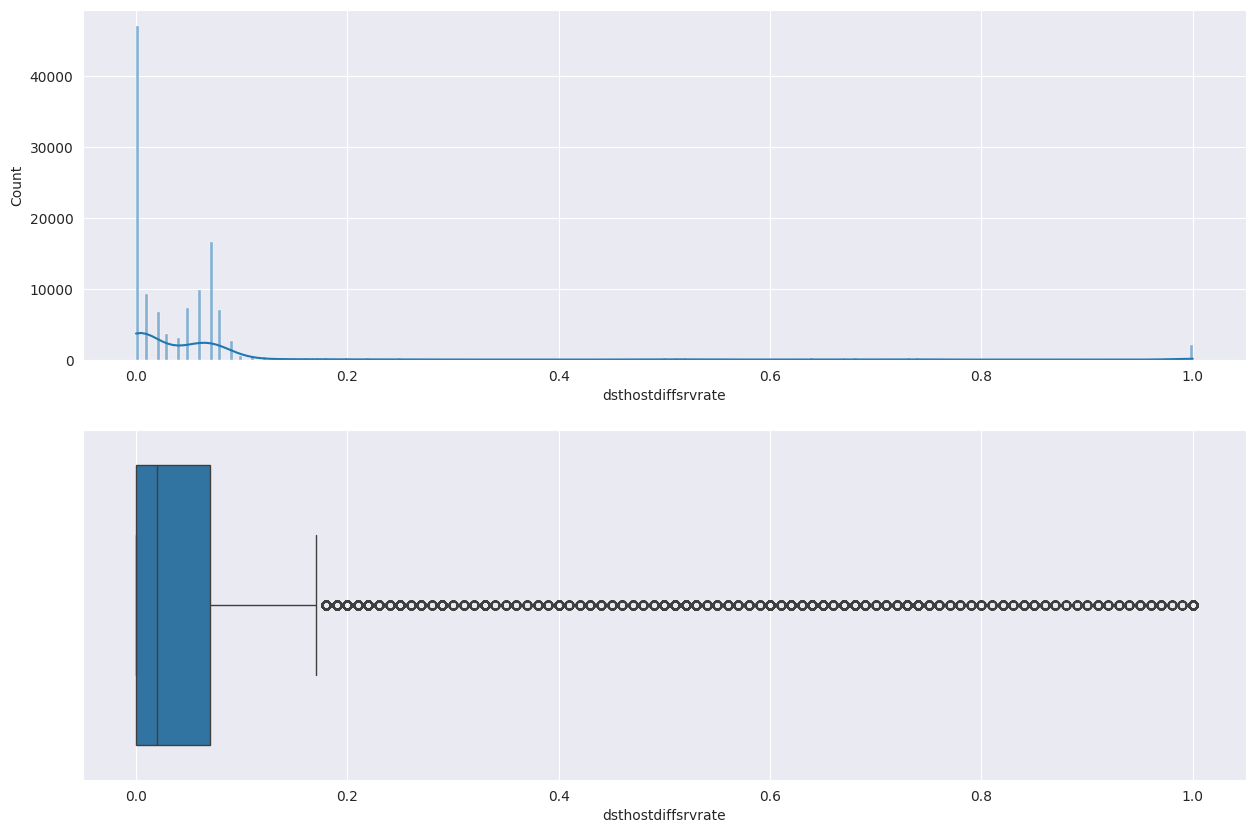

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['dsthostdiffsrvrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['dsthostdiffsrvrate'])

<Axes: xlabel='logdsthostdiffsrvrate', ylabel='Count'>

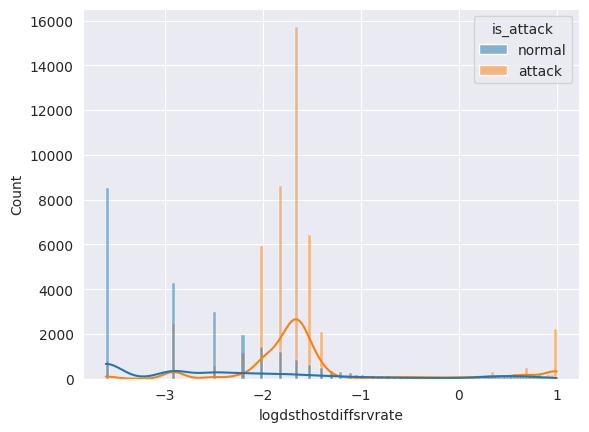

In [36]:
cdf['logdsthostdiffsrvrate'] = np.log(cdf['dsthostdiffsrvrate'])+1
sns.histplot(data=cdf,x='logdsthostdiffsrvrate',kde=True,hue='is_attack')

<Axes: xlabel='dsthostdiffsrvrate', ylabel='Count'>

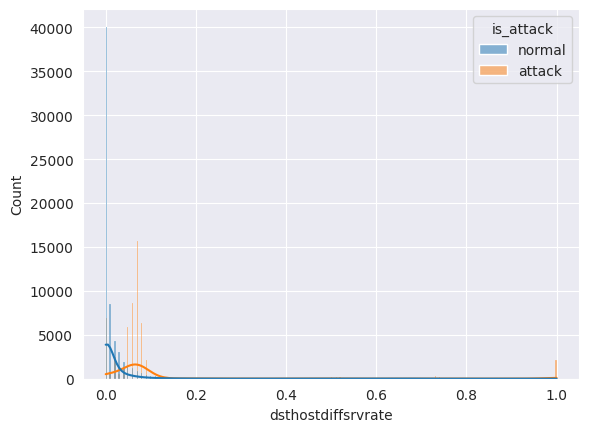

In [37]:
sns.histplot(data=cdf,x='dsthostdiffsrvrate',kde=True,hue='is_attack')

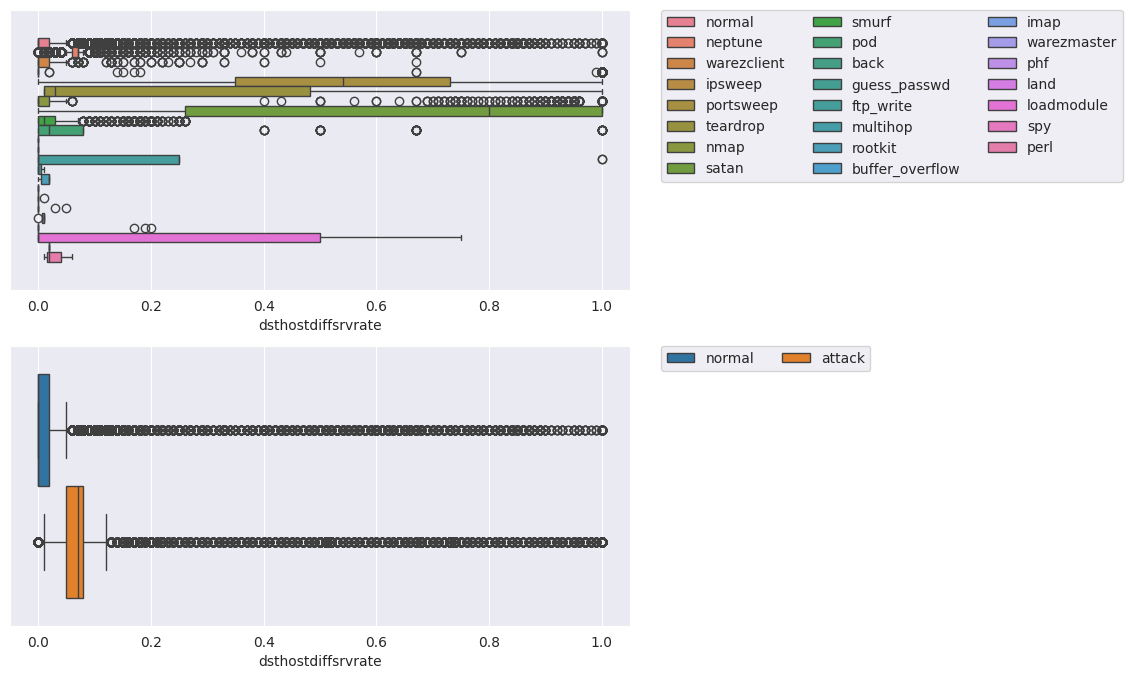

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='dsthostdiffsrvrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='dsthostdiffsrvrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [39]:
odf[odf['col'] == 'dsthostdiffsrvrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
31,dsthostdiffsrvrate,0.0,0.07,0.07,0.175,-0.105,115423,10550,91.62519,8.37481


In [40]:
pd.DataFrame(df['dsthostdiffsrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostdiffsrvrate,125973.0,0.082951,0.188922,0.0,0.0,0.02,0.07,1.0


In [42]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostdiffsrvrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.01
50 percentile value is 0.02
60 percentile value is 0.05
70 percentile value is 0.07
80 percentile value is 0.07
90 percentile value is 0.1
100 percentile value is 1.0


In [43]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostdiffsrvrate'].dropna(),i)))

90 percentile value is 0.1
91 percentile value is 0.14
92 percentile value is 0.2
93 percentile value is 0.31
94 percentile value is 0.47
95 percentile value is 0.56
96 percentile value is 0.67
97 percentile value is 0.74
98 percentile value is 0.93
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='dsthostserrorrate'>

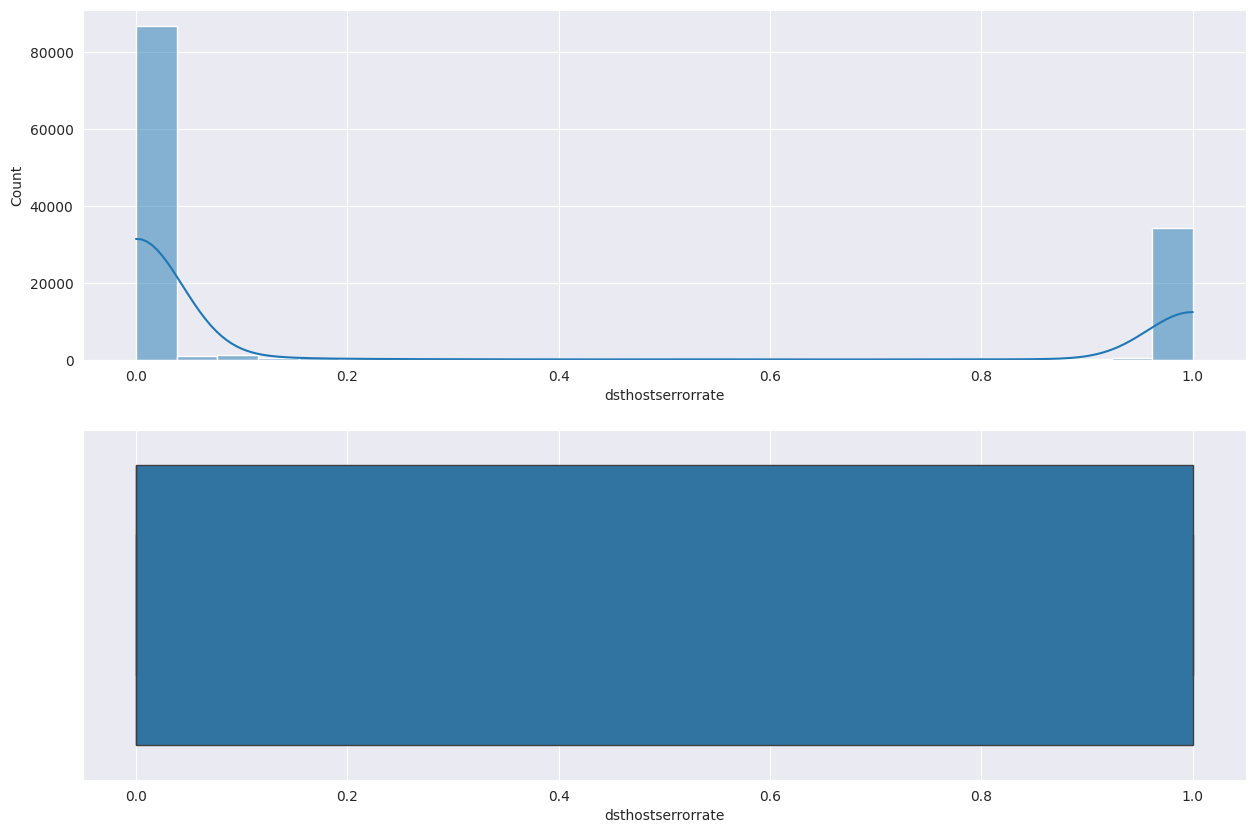

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['dsthostserrorrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['dsthostserrorrate'])

<Axes: xlabel='logdsthostserrorrate', ylabel='Count'>

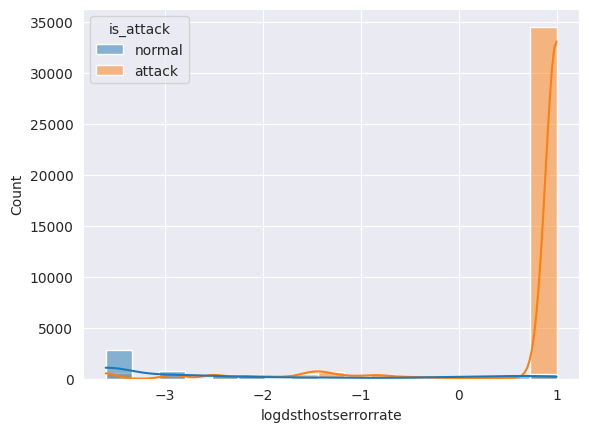

In [45]:
cdf['logdsthostserrorrate'] = np.log(cdf['dsthostserrorrate'])+1
sns.histplot(data=cdf,x='logdsthostserrorrate',kde=True,hue='is_attack')

<Axes: xlabel='dsthostserrorrate', ylabel='Count'>

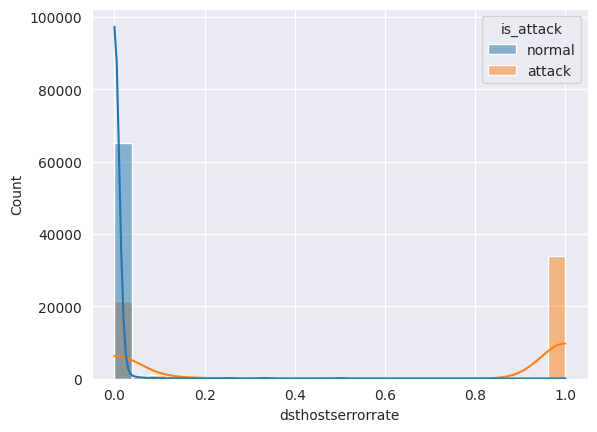

In [46]:
sns.histplot(data=cdf,x='dsthostserrorrate',kde=True,hue='is_attack')

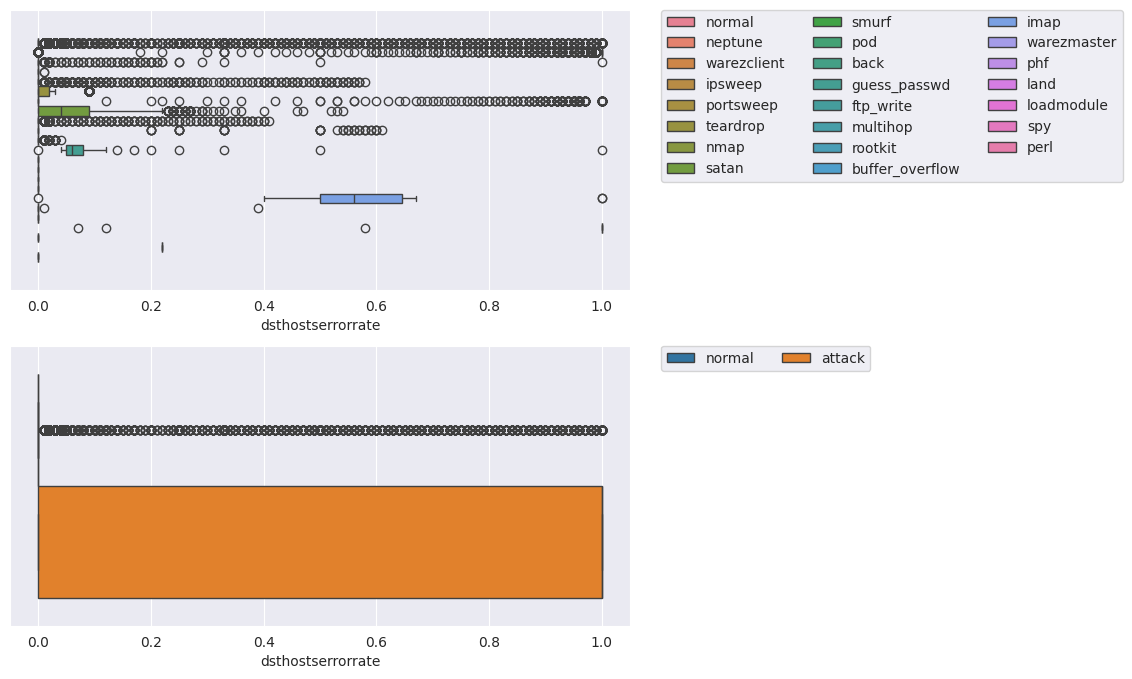

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='dsthostserrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='dsthostserrorrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [48]:
odf[odf['col'] == 'dsthostserrorrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
34,dsthostserrorrate,0.0,1.0,1.0,2.5,-1.5,125973,0,100.0,0.0


In [49]:
pd.DataFrame(df['dsthostserrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostserrorrate,125973.0,0.284452,0.444784,0.0,0.0,0.0,1.0,1.0


In [50]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostserrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.09
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


In [51]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostserrorrate'].dropna(),i)))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='dsthostrerrorrate'>

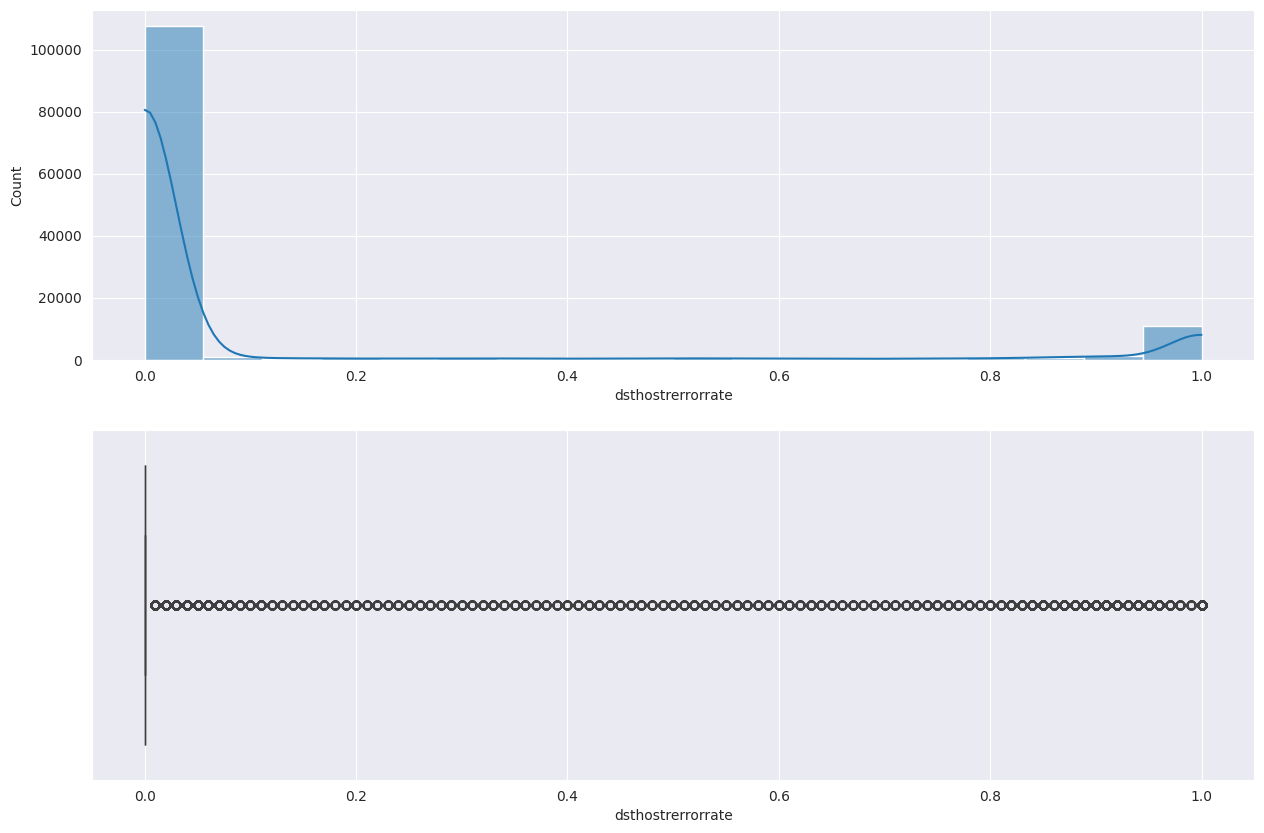

In [52]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['dsthostrerrorrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['dsthostrerrorrate'])

<Axes: xlabel='logdsthostrerrorrate', ylabel='Count'>

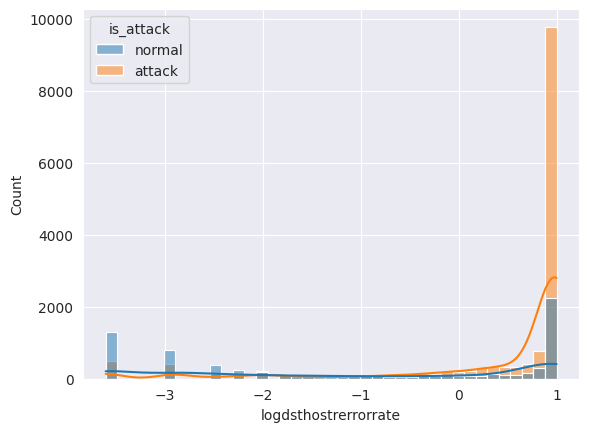

In [53]:
cdf['logdsthostrerrorrate'] = np.log(cdf['dsthostrerrorrate'])+1
sns.histplot(data=cdf,x='logdsthostrerrorrate',kde=True,hue='is_attack')

<Axes: xlabel='dsthostrerrorrate', ylabel='Count'>

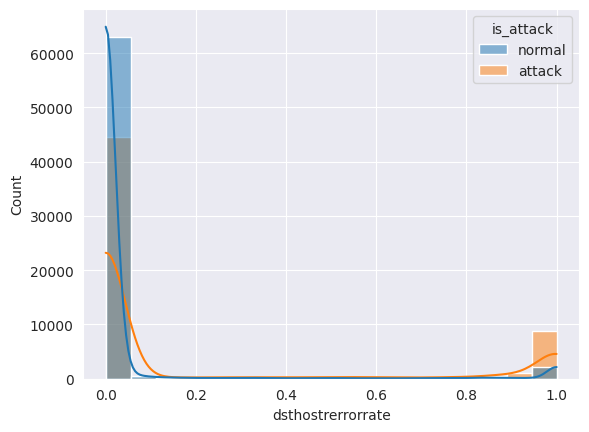

In [54]:
sns.histplot(data=cdf,x='dsthostrerrorrate',kde=True,hue='is_attack')

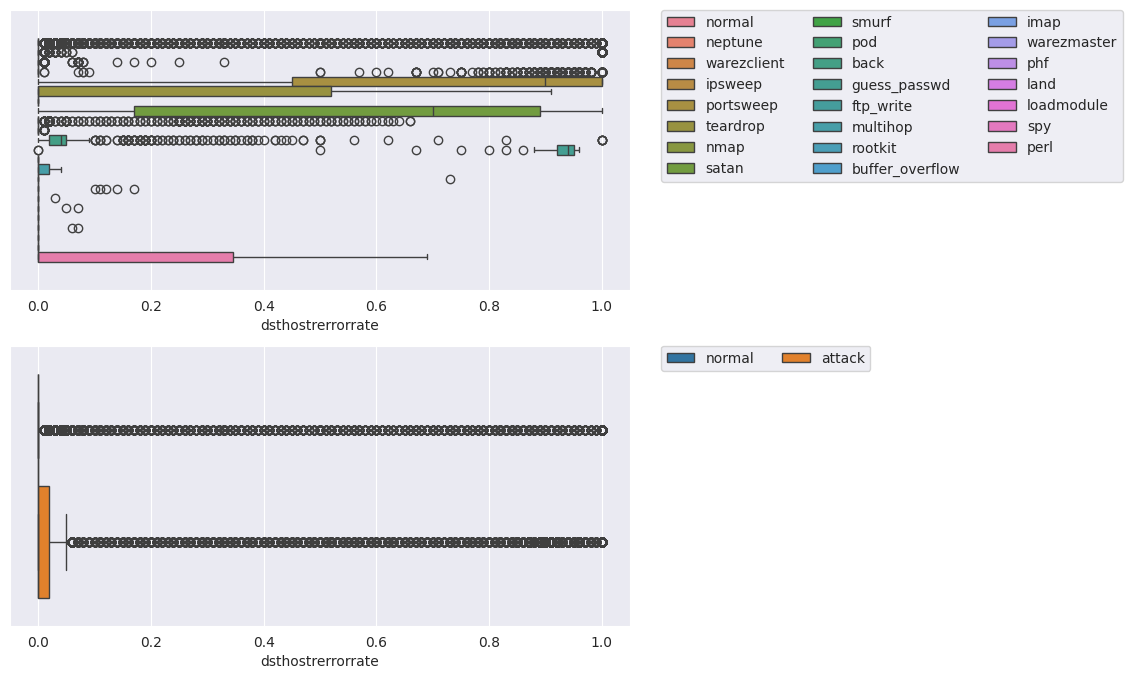

In [55]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='dsthostrerrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='dsthostrerrorrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [56]:
odf[odf['col'] == 'dsthostrerrorrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
36,dsthostrerrorrate,0.0,0.0,0.0,0.0,0.0,103178,22795,81.904853,18.095147


In [57]:
pd.DataFrame(df['dsthostrerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostrerrorrate,125973.0,0.118832,0.306557,0.0,0.0,0.0,0.0,1.0


In [58]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostrerrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 0.84
100 percentile value is 1.0


In [59]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostrerrorrate'].dropna(),i)))

90 percentile value is 0.84
91 percentile value is 0.91
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='dsthostsamesrcportrate'>

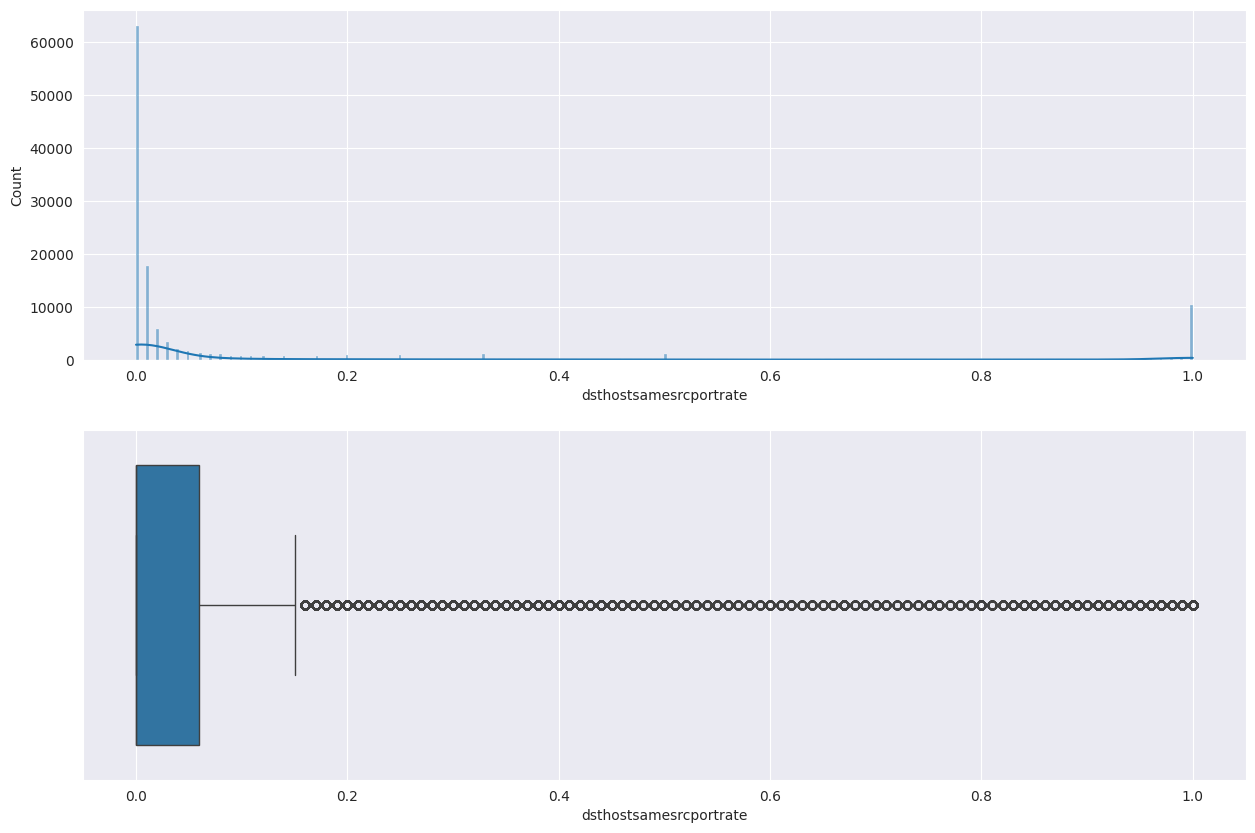

In [60]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['dsthostsamesrcportrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['dsthostsamesrcportrate'])

<Axes: xlabel='logdsthostsamesrcportrate', ylabel='Count'>

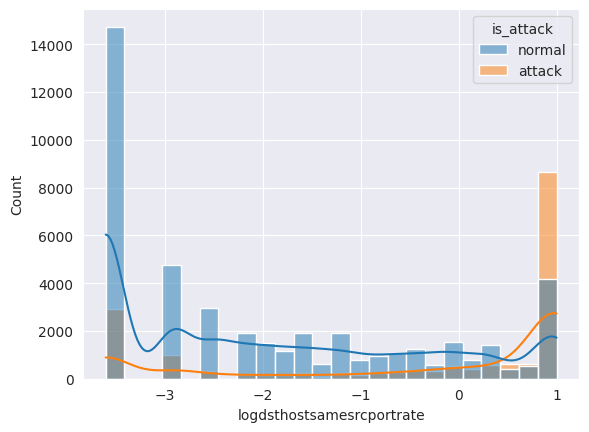

In [61]:
cdf['logdsthostsamesrcportrate'] = np.log(cdf['dsthostsamesrcportrate'])+1
sns.histplot(data=cdf,x='logdsthostsamesrcportrate',kde=True,hue='is_attack')

<Axes: xlabel='dsthostsamesrcportrate', ylabel='Count'>

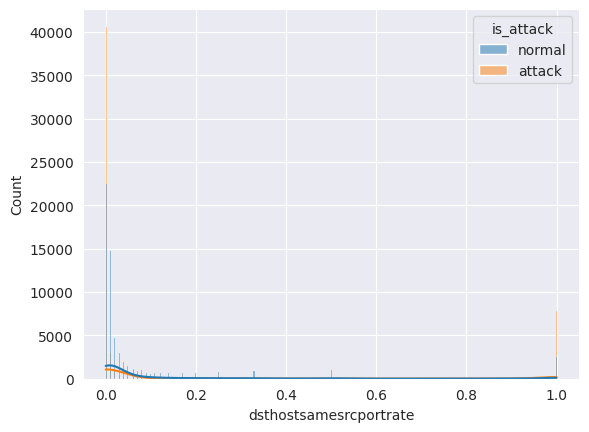

In [62]:
sns.histplot(data=cdf,x='dsthostsamesrcportrate',kde=True,hue='is_attack')

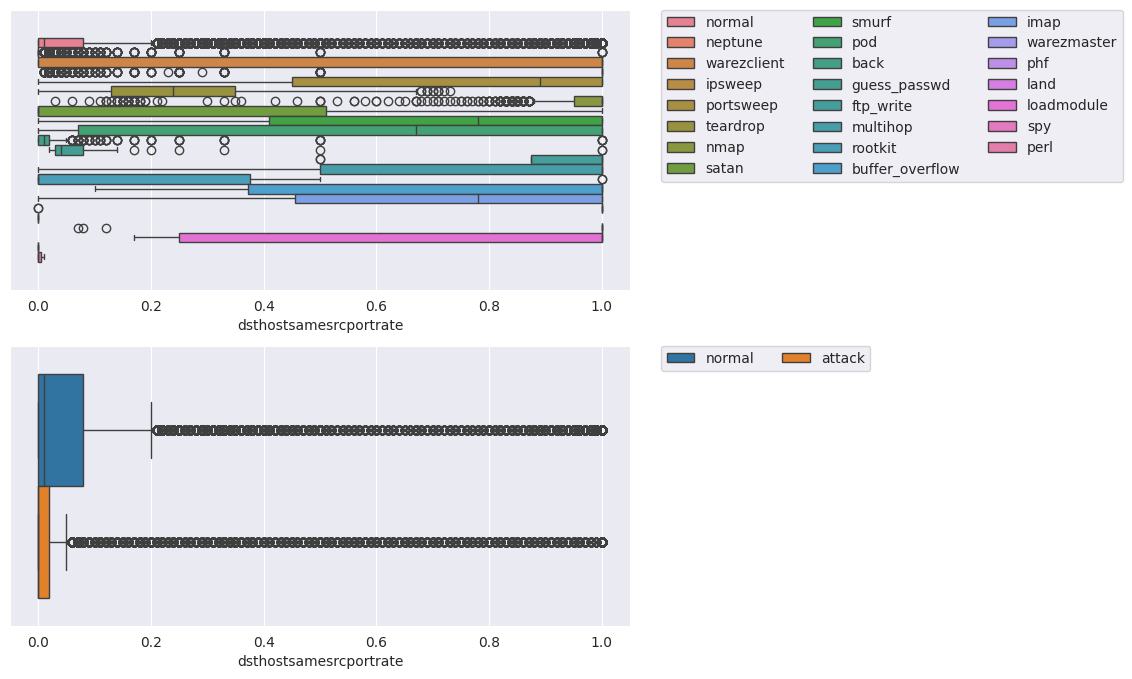

In [63]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='dsthostsamesrcportrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='dsthostsamesrcportrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [64]:
odf[odf['col'] == 'dsthostsamesrcportrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
32,dsthostsamesrcportrate,0.0,0.06,0.06,0.15,-0.09,100921,25052,80.113199,19.886801


In [65]:
pd.DataFrame(df['dsthostsamesrcportrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsamesrcportrate,125973.0,0.148379,0.308997,0.0,0.0,0.0,0.06,1.0


In [66]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsamesrcportrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.01
70 percentile value is 0.03
80 percentile value is 0.15
90 percentile value is 0.84
100 percentile value is 1.0


In [67]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsamesrcportrate'].dropna(),i)))

90 percentile value is 0.84
91 percentile value is 0.94
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='dsthostsrvdiffhostrate'>

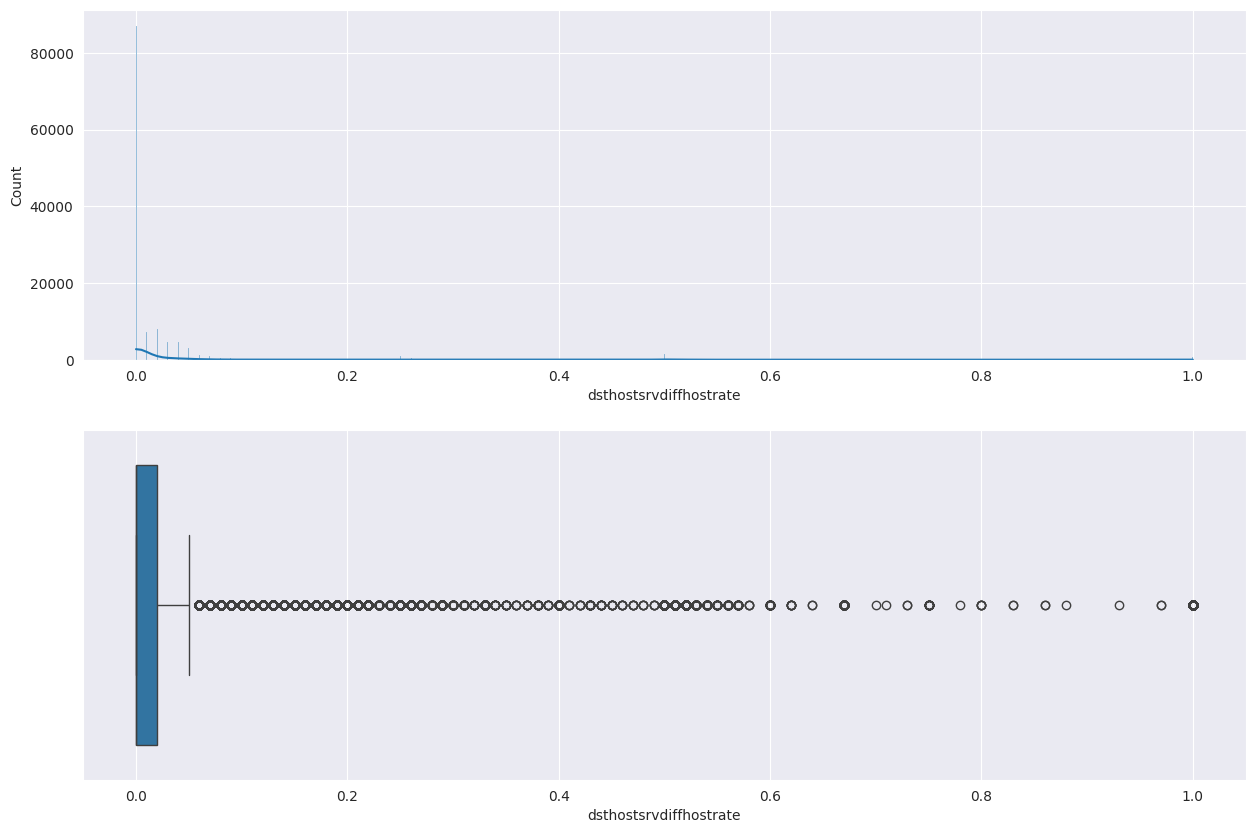

In [68]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['dsthostsrvdiffhostrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['dsthostsrvdiffhostrate'])

<Axes: xlabel='logdsthostsrvdiffhostrate', ylabel='Count'>

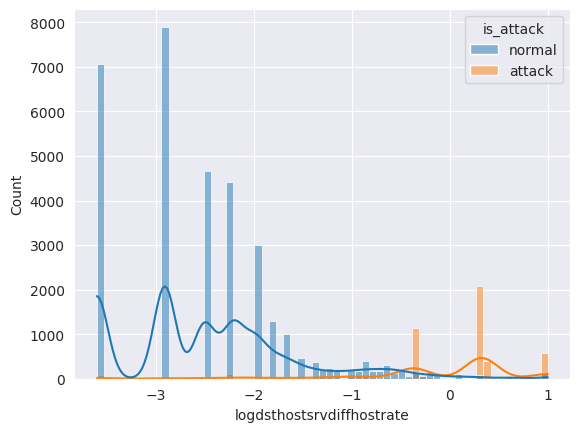

In [69]:
cdf['logdsthostsrvdiffhostrate'] = np.log(cdf['dsthostsrvdiffhostrate'])+1
sns.histplot(data=cdf,x='logdsthostsrvdiffhostrate',kde=True,hue='is_attack')

<Axes: xlabel='dsthostsrvdiffhostrate', ylabel='Count'>

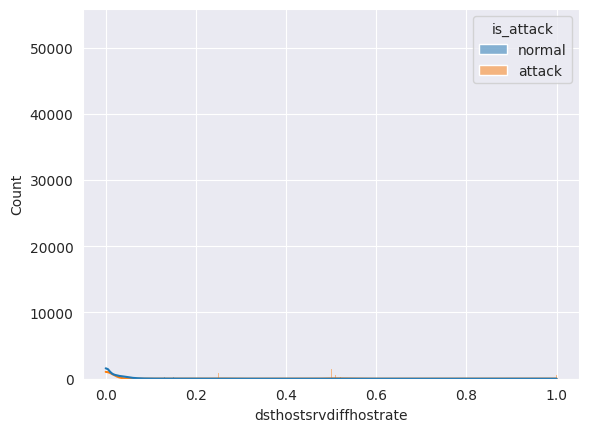

In [70]:
sns.histplot(data=cdf,x='dsthostsrvdiffhostrate',kde=True,hue='is_attack')

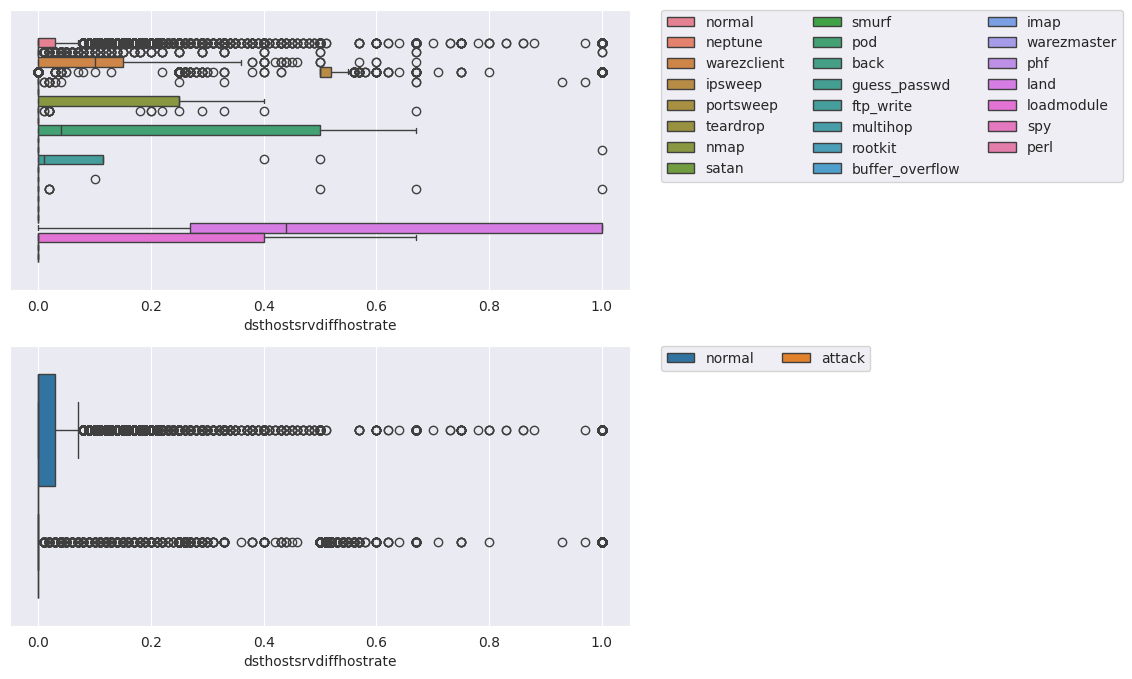

In [71]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='dsthostsrvdiffhostrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='dsthostsrvdiffhostrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [72]:
odf[odf['col'] == 'dsthostsrvdiffhostrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
33,dsthostsrvdiffhostrate,0.0,0.02,0.02,0.05,-0.03,114291,11682,90.726584,9.273416


In [73]:
pd.DataFrame(df['dsthostsrvdiffhostrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvdiffhostrate,125973.0,0.032542,0.112564,0.0,0.0,0.0,0.02,1.0


In [74]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvdiffhostrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.01
80 percentile value is 0.02
90 percentile value is 0.05
100 percentile value is 1.0


In [75]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvdiffhostrate'].dropna(),i)))

90 percentile value is 0.05
91 percentile value is 0.06
92 percentile value is 0.07
93 percentile value is 0.09
94 percentile value is 0.13
95 percentile value is 0.18
96 percentile value is 0.25
97 percentile value is 0.33
98 percentile value is 0.5
99 percentile value is 0.52
100 percentile value is 1.0


<Axes: xlabel='dsthostsamesrcportrate'>

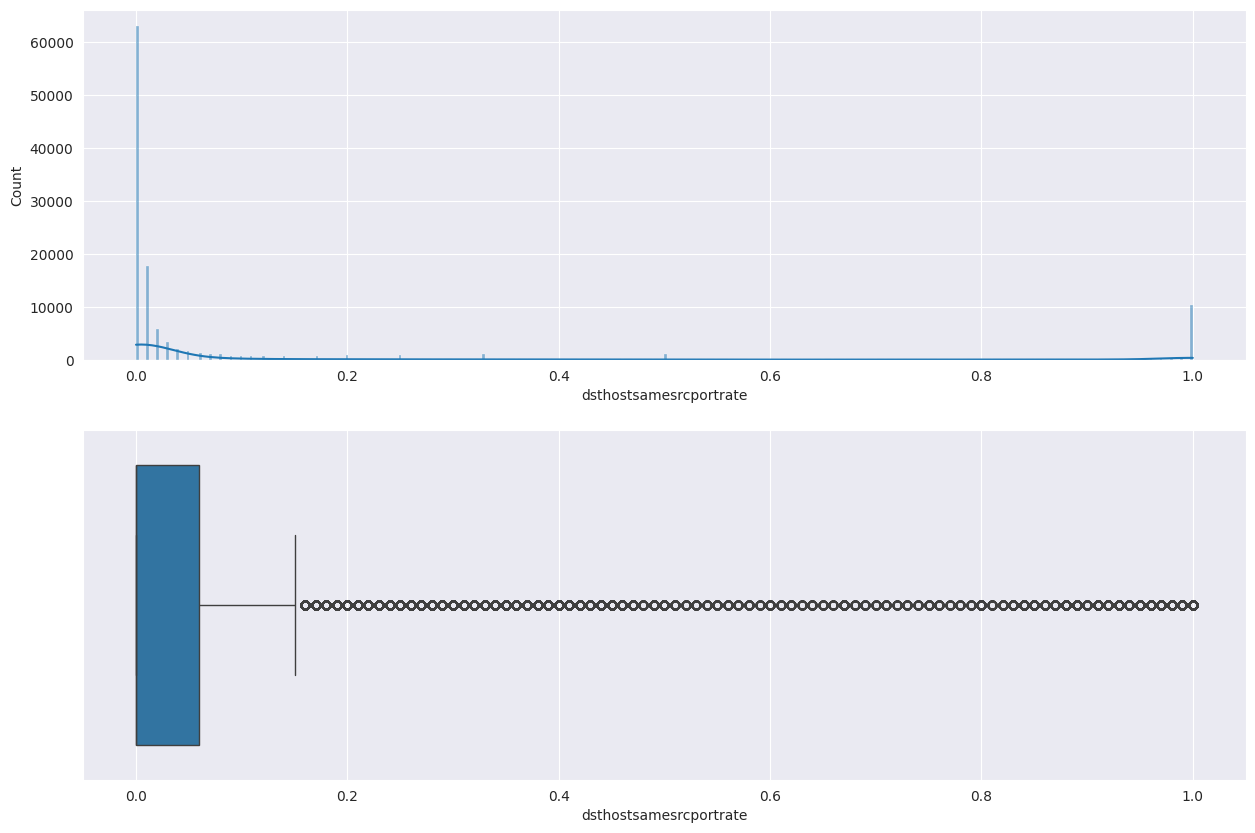

In [76]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['dsthostsamesrcportrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['dsthostsamesrcportrate'])

<Axes: xlabel='logdsthostsamesrcportrate', ylabel='Count'>

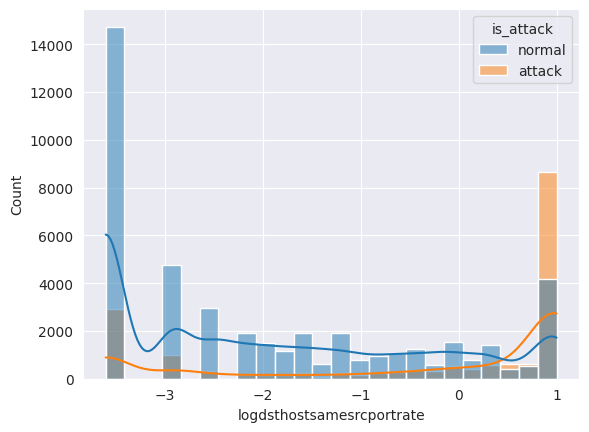

In [77]:
cdf['logdsthostsamesrcportrate'] = np.log(cdf['dsthostsamesrcportrate'])+1
sns.histplot(data=cdf,x='logdsthostsamesrcportrate',kde=True,hue='is_attack')

<Axes: xlabel='dsthostsamesrcportrate', ylabel='Count'>

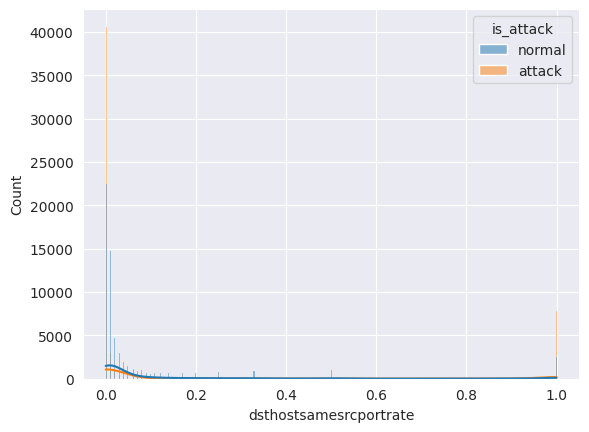

In [78]:
sns.histplot(data=cdf,x='dsthostsamesrcportrate',kde=True,hue='is_attack')

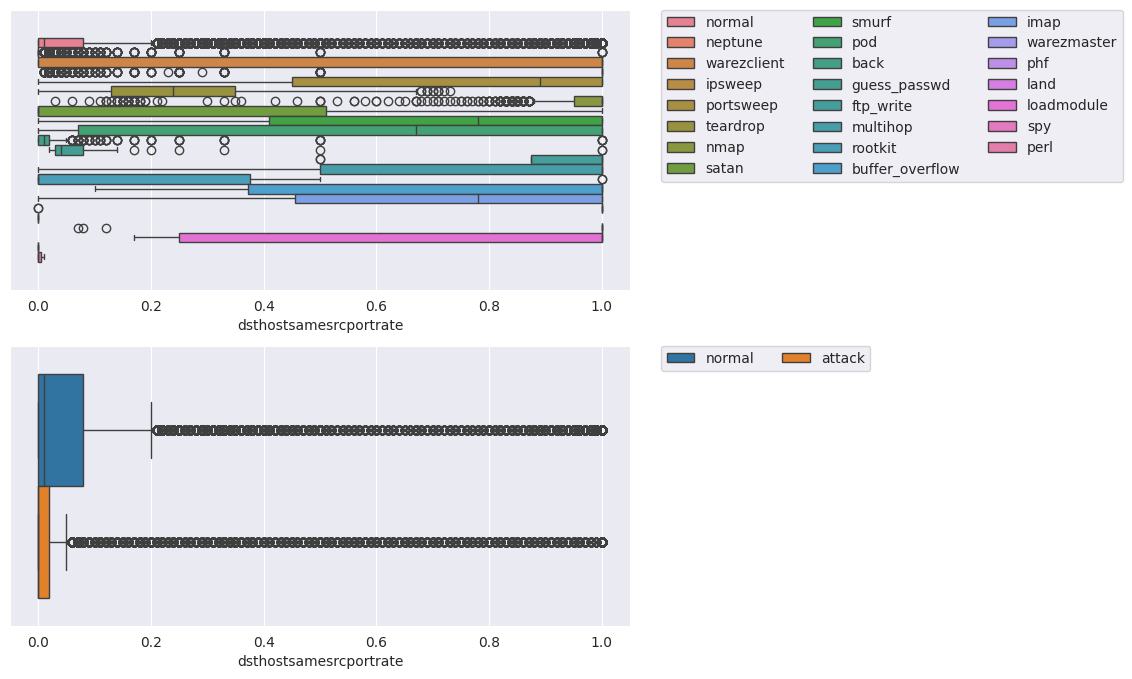

In [79]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='dsthostsamesrcportrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='dsthostsamesrcportrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [80]:
odf[odf['col'] == 'dsthostsamesrcportrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
32,dsthostsamesrcportrate,0.0,0.06,0.06,0.15,-0.09,100921,25052,80.113199,19.886801


In [81]:
pd.DataFrame(df['dsthostsamesrcportrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsamesrcportrate,125973.0,0.148379,0.308997,0.0,0.0,0.0,0.06,1.0


In [82]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsamesrcportrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.01
70 percentile value is 0.03
80 percentile value is 0.15
90 percentile value is 0.84
100 percentile value is 1.0


In [83]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsamesrcportrate'].dropna(),i)))

90 percentile value is 0.84
91 percentile value is 0.94
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='dsthostsrvserrorrate'>

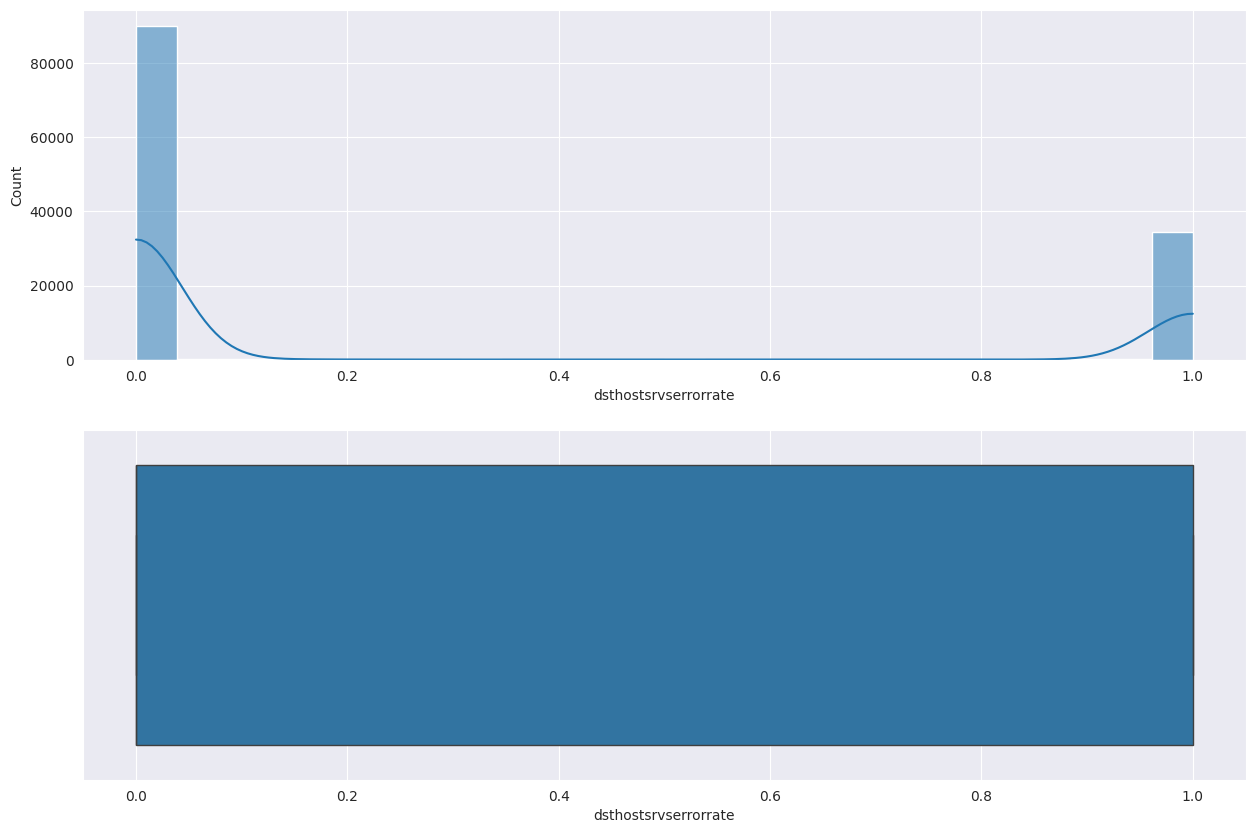

In [84]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['dsthostsrvserrorrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['dsthostsrvserrorrate'])

<Axes: xlabel='logdsthostsrvserrorrate', ylabel='Count'>

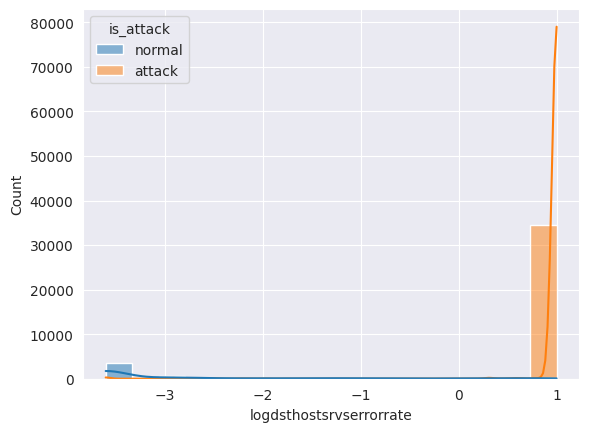

In [85]:
cdf['logdsthostsrvserrorrate'] = np.log(cdf['dsthostsrvserrorrate'])+1
sns.histplot(data=cdf,x='logdsthostsrvserrorrate',kde=True,hue='is_attack')

<Axes: xlabel='dsthostsrvserrorrate', ylabel='Count'>

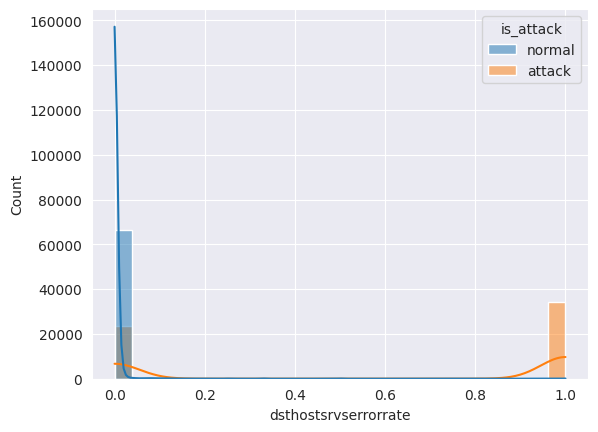

In [86]:
sns.histplot(data=cdf,x='dsthostsrvserrorrate',kde=True,hue='is_attack')

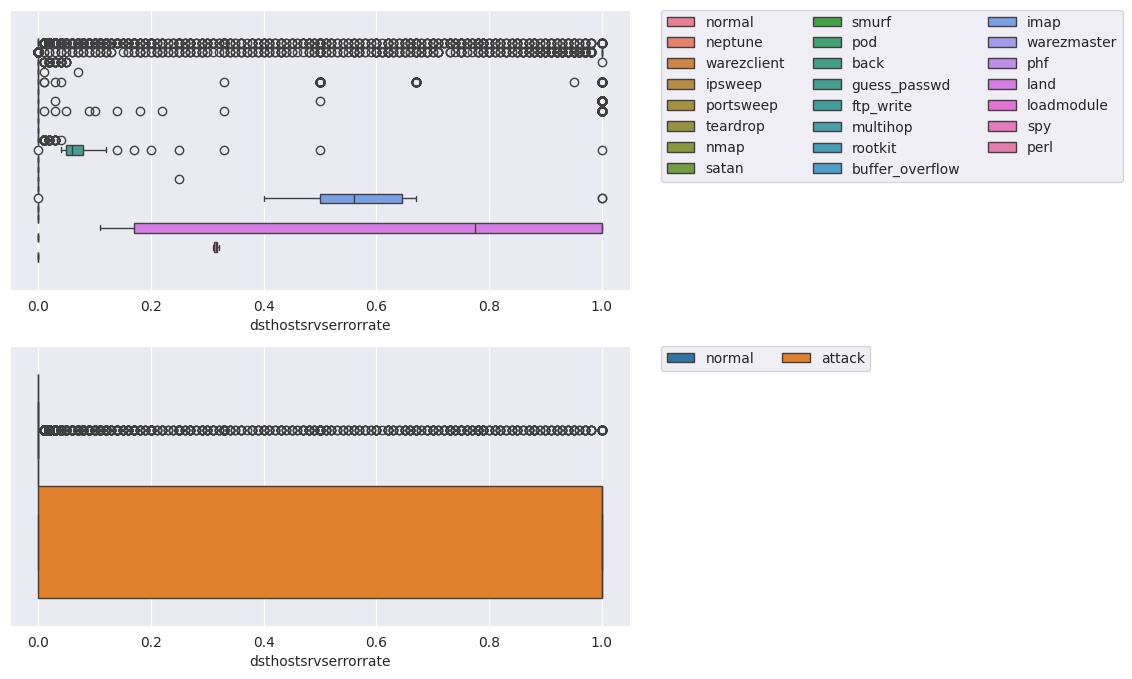

In [87]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='dsthostsrvserrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='dsthostsrvserrorrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [88]:
odf[odf['col'] == 'dsthostsrvserrorrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
35,dsthostsrvserrorrate,0.0,1.0,1.0,2.5,-1.5,125973,0,100.0,0.0


In [89]:
pd.DataFrame(df['dsthostsrvserrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvserrorrate,125973.0,0.278485,0.445669,0.0,0.0,0.0,1.0,1.0


In [90]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvserrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.01
80 percentile value is 1.0
90 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='dsthostsrvrerrorrate'>

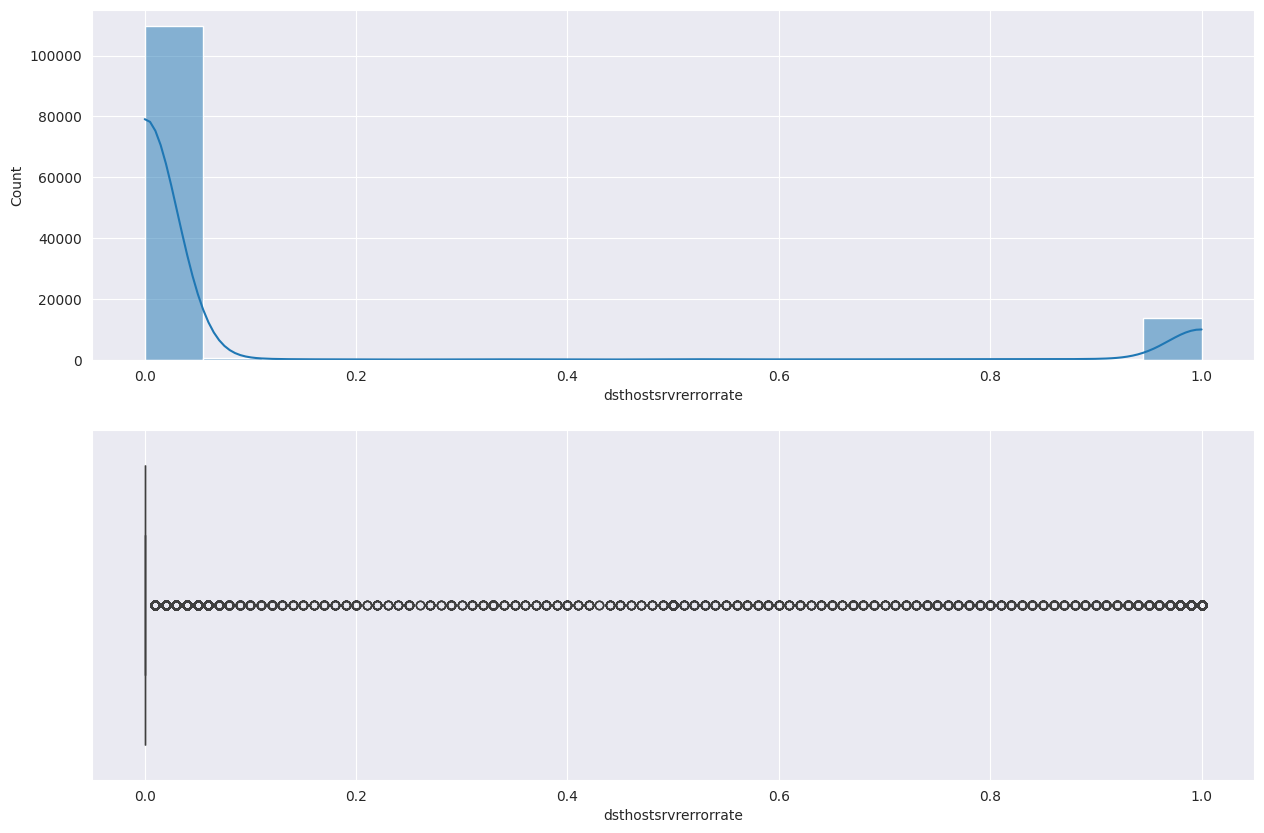

In [92]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['dsthostsrvrerrorrate'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['dsthostsrvrerrorrate'])

<Axes: xlabel='logdsthostsrvrerrorrate', ylabel='Count'>

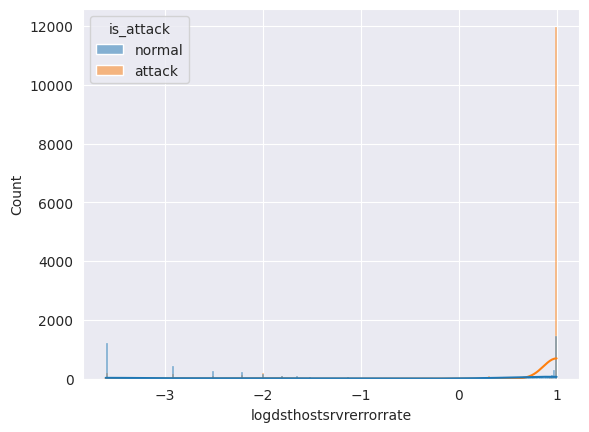

In [93]:
cdf['logdsthostsrvrerrorrate'] = np.log(cdf['dsthostsrvrerrorrate'])+1
sns.histplot(data=cdf,x='logdsthostsrvrerrorrate',kde=True,hue='is_attack')

<Axes: xlabel='dsthostsrvrerrorrate', ylabel='Count'>

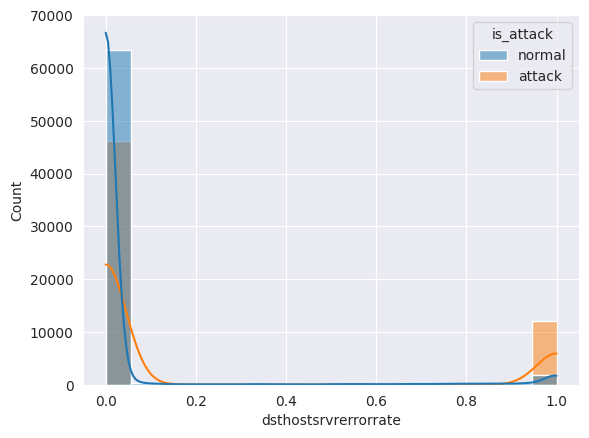

In [94]:
sns.histplot(data=cdf,x='dsthostsrvrerrorrate',kde=True,hue='is_attack')

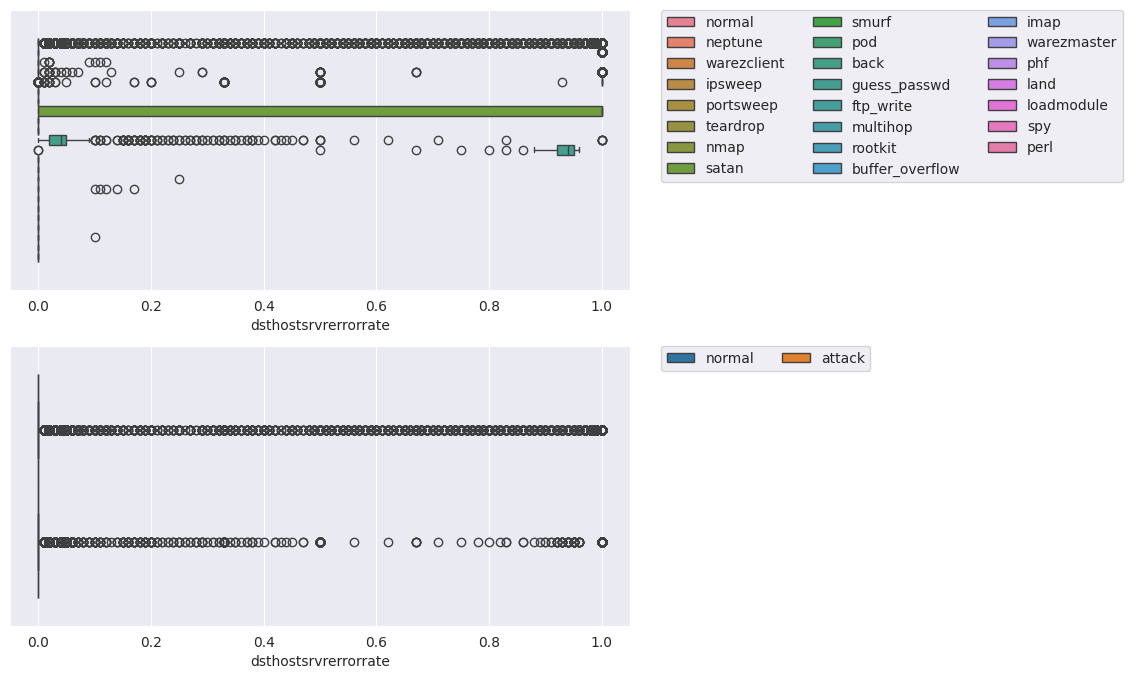

In [95]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='dsthostsrvrerrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='dsthostsrvrerrorrate',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [96]:
odf[odf['col'] == 'dsthostsrvrerrorrate']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
37,dsthostsrvrerrorrate,0.0,0.0,0.0,0.0,0.0,106616,19357,84.634009,15.365991


In [97]:
pd.DataFrame(df['dsthostsrvrerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvrerrorrate,125973.0,0.12024,0.319459,0.0,0.0,0.0,0.0,1.0


In [98]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvrerrorrate'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 1.0
100 percentile value is 1.0


In [99]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['dsthostsrvrerrorrate'].dropna(),i)))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


<Axes: xlabel='lastflag'>

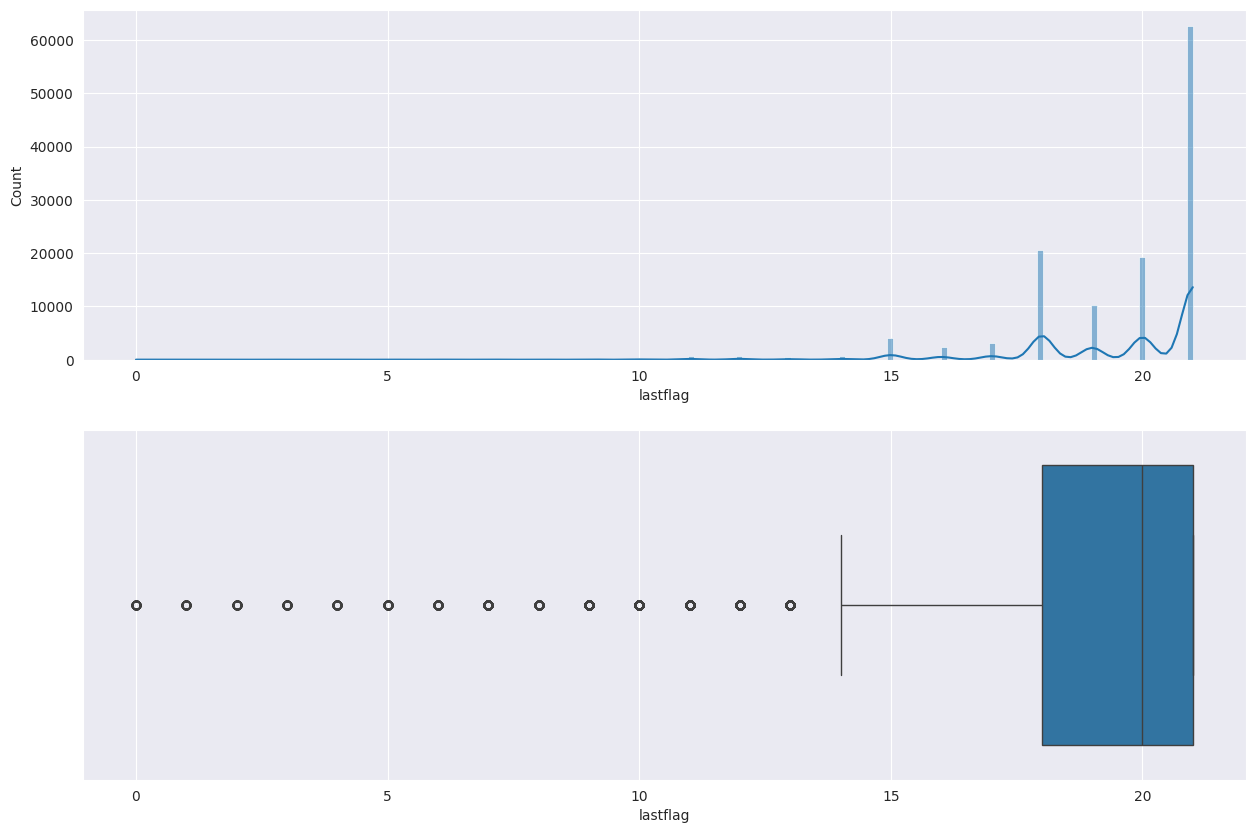

In [100]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['lastflag'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['lastflag'])

<Axes: xlabel='loglastflag', ylabel='Count'>

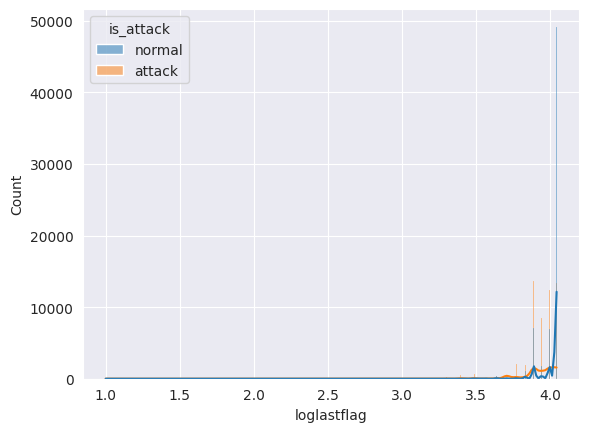

In [101]:
cdf['loglastflag'] = np.log(cdf['lastflag'])+1
sns.histplot(data=cdf,x='loglastflag',kde=True,hue='is_attack')

<Axes: xlabel='lastflag', ylabel='Count'>

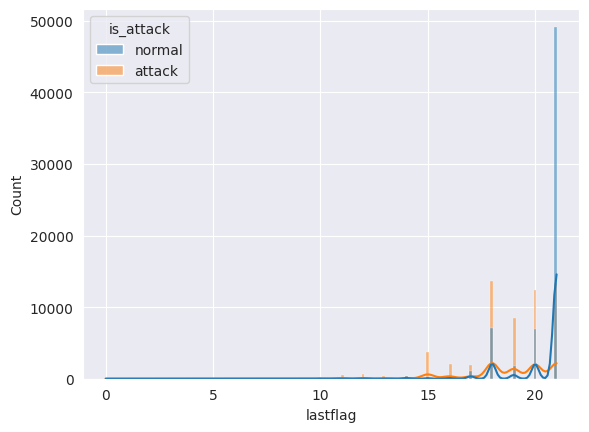

In [102]:
sns.histplot(data=cdf,x='lastflag',kde=True,hue='is_attack')

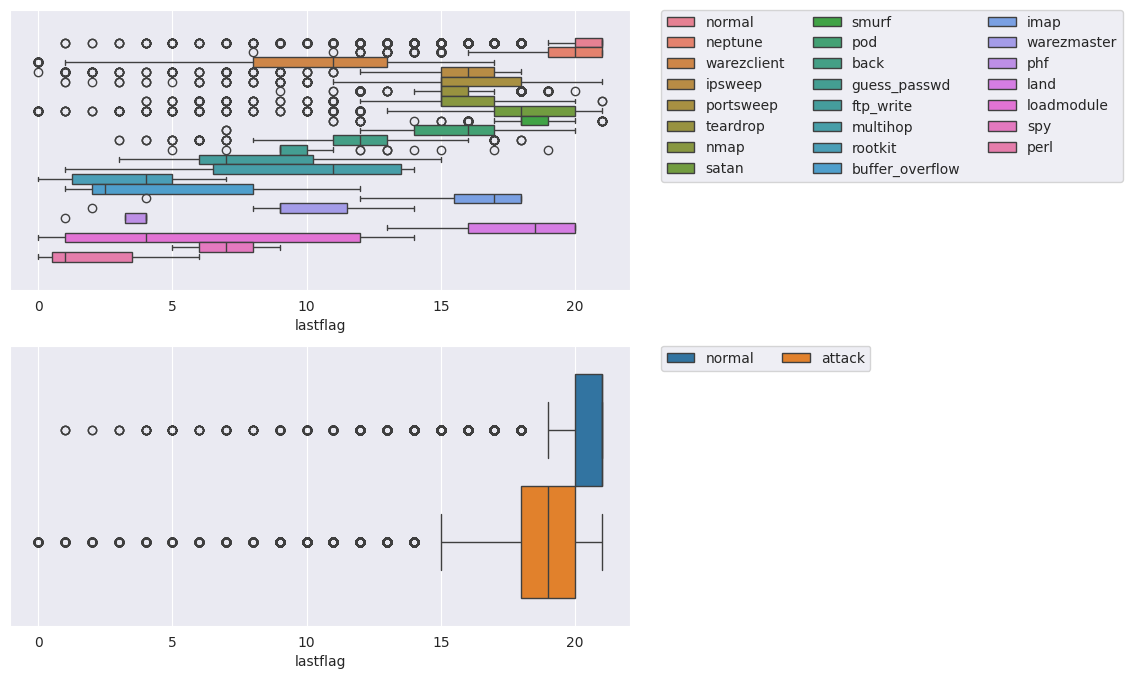

In [103]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='lastflag',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='lastflag',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [104]:
odf[odf['col'] == 'lastflag']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
38,lastflag,18.0,21.0,3.0,25.5,13.5,122978,2995,97.622506,2.377494


In [105]:
pd.DataFrame(df['lastflag'].describe()).T

,count,mean,std,min,25%,50%,75%,max
lastflag,125973.0,19.50406,2.291503,0.0,18.0,20.0,21.0,21.0


In [106]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['lastflag'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 17.0
20 percentile value is 18.0
30 percentile value is 19.0
40 percentile value is 20.0
50 percentile value is 20.0
60 percentile value is 21.0
70 percentile value is 21.0
80 percentile value is 21.0
90 percentile value is 21.0
100 percentile value is 21.0


In [107]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['lastflag'].dropna(),i)))

90 percentile value is 21.0
91 percentile value is 21.0
92 percentile value is 21.0
93 percentile value is 21.0
94 percentile value is 21.0
95 percentile value is 21.0
96 percentile value is 21.0
97 percentile value is 21.0
98 percentile value is 21.0
99 percentile value is 21.0
100 percentile value is 21.0
